<a href="https://colab.research.google.com/github/arlapalliramya/MINI-PROJECT/blob/main/Minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader

In [2]:
!mkdir images

In [3]:
from bing_image_downloader import downloader
downloader.download("flowers", limit=30,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)




[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://1.bp.blogspot.com/-1l4T6MDQgqo/WSKvmmZ-KJI/AAAAAAAAAyM/xD2vAPs6JF8pLJl6lhnceuRdKWntNYovACLcB/s1600/9.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.hdwallpapers.in/download/pink_cosmos_flowers-1680x1050.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://4.bp.blogspot.com/-_mvArckgaVg/TeRoYxI8EPI/AAAAAAAAC28/5OXP-yL6wqQ/s1600/Beautiful+Flowers+1+%25284%2529.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://yodobi.com/4k-Wallpapers/purple-spring-flowers-wallpapers-high-definition-Is-4K-Wallpaper.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.hdwallpapers.in/download/beautiful_purple_flowers-wide.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://kazzer88.files.wordpress.com/2012/09/21-september-2012-pink-flowers.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://3.bp.blogspot.com/-anSqxQWm88Q/TZId

In [4]:
from bing_image_downloader import downloader
downloader.download("Teddy bear", limit=30,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)




[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://www.sitnsleep.com/blog/wp-content/uploads/2019/04/teddy-bear.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://primopromo.com.au/assets/Uploads/Teddy-Bear+Royal-Blue.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://static.kodajo.com/images/user/fileUp/7a658e687aa0cb3f805ffd19c07e64db.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://cdn.funcheap.com/wp-content/uploads/2018/04/BABW.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn.sayitwithbears.co.uk/wp-content/uploads/2017/04/giant-teddy-bear-white-harry-925x1024.jpg
[!] Issue getting: https://cdn.sayitwithbears.co.uk/wp-content/uploads/2017/04/giant-teddy-bear-white-harry-925x1024.jpg
[!] Error:: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)>
[%] Downloading Image #5 from http://pngimg.com/uploads/teddy_bear/teddy_bear_PNG7.png
[%] Fil

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import imread
from skimage.io import imread
from skimage.transform import resize
 
target = []
images = []
flat_data = []
 
  

DATADIR = '/content/images'
CATEGORIES = ['flowers','Teddy bear']

for category in CATEGORIES:
   class_num = CATEGORIES.index(category)
   path = os.path.join(DATADIR,category)
   for img in os.listdir(path):
     img_array = imread(os.path.join(path,img))
     img_resized = resize(img_array,(150,150,3))
     flat_data.append(img_resized.flatten())
     images.append(img_resized)
     target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


In [6]:
flat_data[0]

array([0.08637908, 0.        , 0.00392157, ..., 0.89354248, 0.98429333,
       0.99215686])

In [8]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

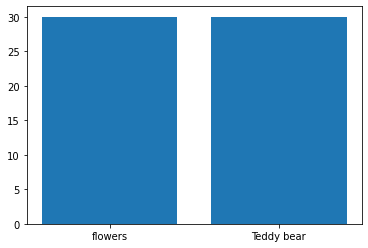

In [9]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0])

In [14]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [16]:
accuracy_score(y_pred,y_test)

0.7222222222222222

In [18]:
confusion_matrix(y_pred,y_test)


array([[9, 3],
       [2, 4]])

In [19]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [20]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/White_and_yellow_flower.JPG/330px-White_and_yellow_flower.JPG
(248, 330, 3)
PREDICTED OUTPUT: flowers


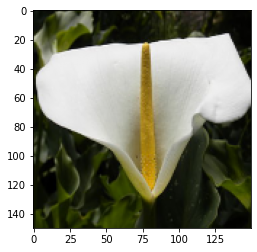

In [23]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')




In [24]:
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok


     |████████████████████████████████| 7.5MB 11.4MB/s 
     |████████████████████████████████| 112kB 39.7MB/s 
     |████████████████████████████████| 81kB 6.4MB/s 
     |████████████████████████████████| 4.6MB 47.7MB/s 
     |████████████████████████████████| 163kB 46.0MB/s 
     |████████████████████████████████| 122kB 61.8MB/s 
     |████████████████████████████████| 71kB 6.1MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=619e227234cabafae840dfd6b9e3c9e360b5dbc3b3b1788ee6d8d0fac4b1b4b2
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.0 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


     |████████████████████████████████| 737kB 12.1MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.2-cp36-none-any.whl size=18972 sha256=2f1f4f6b07ef953f1afd605425a83045c5ff3226a993352ce79e8f83d759326e
  Stored in directory: /root/.cache/pip/wheels/e1/94/52/c88ac157149e3506d377ae531697455b43ab49b76d3f2cc862
Successfully built pyngrok


In [25]:
%%writefile app.py
import streamlit as st
st.title('Image Classifier')

Writing app.py


In [26]:
!nohup stremlit run app.py &

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'
nohup: failed to run command 'stremlit': No such file or directory


<NgrokTunnel: "http://e2474e7ff3ff.ngrok.io" -> "http://localhost:80">